<a href="https://colab.research.google.com/github/lutherleo/MLClass/blob/main/MLSp24_demo_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo:  Predicting Diabetes Progression using Mulitple Linear Regression

In this demo, you will learn how to:
* Fit multiple linear regression models, by hand and using Python's Scikit-Learn package.  
* Split data into training and test set.
* Manipulate and visualize multivariable arrays.

We first load the packages as usual.

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We will also load a few modules from [scikit-learn](https://scikit-learn.org/stable/), which is one of the most popular machine learning libraries in Python that does not focus specifically on neural nets and deep learning. Using the libary is a bit overkill at this point, but I want you to get some practice because it will be very useful later in the course, and for your mini-projects.

In [ ]:
from sklearn import datasets, linear_model

## Diabetes Data Example
To illustrate the concepts, we load a well-known diabetes data set.  This dataset can be downloaded in raw form from [https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). However, it is also included in the `sklearn.datasets` module, which prepackages a number of benchmark datasets for easy experimentation. It can be loaded as follows:

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

It's always good to check what type of objects we have loaded in. You can confirm using the `type` function that our data is preloaded into `numpy` arrays, which is how we want it.

In [ ]:
type(X)

numpy.ndarray

The predictor variables are **age**, **sex**, **body mass index**, **average blood pressure**, and **six blood serum measurements** (think iron, cholesterol, lipid levels, etc.). Each corresponds to a column in the data matrix `X`. Note that these columns have been *mean centered* and had their *variance normalized* (i.e. scaled). This will not effect your linear regression model at all, but it's good to know.

When you look at the first 5 entries of the **age** column, we don't see age numbers we might expect:

In [ ]:
X[0:5,0]

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306])

And when you look at the first 5 entries of the **sex** column, we don't see binary categories like 1 for female, 2 for male. We see real numbers.

In [ ]:
X[0:5,1]

array([ 0.05068012, -0.04464164,  0.05068012, -0.04464164, -0.04464164])

**NOTE**: This is one reason to be cautious about using built in datasets. Often a lot of information is lost during preprocessing which makes it harder to reason about the data than if you were working with the raw files. This is just a simple teaching demo, so we don't care for today, but **keep that in mind** when downloading data for your projects.

The target values `y` represent a "quantitative measure of diabetes disease progression" that we wish to predict. The exact meaning of this measure seems to have been lost in data translation, but we will work with it anyway.

The number of attributes and samples are computed from the shape:

In [ ]:
nsamp, natt = X.shape
print("num samples="+str(nsamp)+" num attributes="+str(natt))

num samples=442 num attributes=10


## Using Simple Linear Regression for Each Feature Individually

As a first attempt to predict diabetes progression, we could try *one attribute at a time*.  That is, for each attribute $x_k$, we could attempt to fit a simple linear regression model:
$$ y \approx \beta_{0,k} + \beta_{1,k}x_k$$
where $\beta_{0,k}$ and $\beta_{1,k}$ are the coefficients in the simple linear regression model using only the attribute $x_k$.

The following code computes the $\ell_2$ loss for each variable $k$ as well as the coefficients in the linear model, $\beta_{0,k}$ and $\beta_{1,k}$

In [ ]:
ym = np.mean(y)
losses = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    errs = y - beta1[k]*X[:,k] - beta0[k]
    losses[k] = np.sum(errs**2)

    print(str(k)+" loss="+"{:.2e}".format(losses[k])+" beta0="+str(beta0[k])+" beta1="+str(beta1[k]))


0 loss=2.53e+06 beta0=152.13348416289605 beta1=304.1830745282947
1 loss=2.62e+06 beta0=152.13348416289594 beta1=69.71535567841465
2 loss=1.72e+06 beta0=152.1334841628967 beta1=949.435260383949
3 loss=2.11e+06 beta0=152.13348416289585 beta1=714.7416437042876
4 loss=2.50e+06 beta0=152.13348416289597 beta1=343.2544518889643
5 loss=2.54e+06 beta0=152.1334841628959 beta1=281.7845933524592
6 loss=2.21e+06 beta0=152.13348416289566 beta1=-639.1452793225127
7 loss=2.14e+06 beta0=152.13348416289568 beta1=696.8830300922431
8 loss=1.78e+06 beta0=152.13348416289628 beta1=916.1387228150982
9 loss=2.24e+06 beta0=152.13348416289614 beta1=619.2228206843339


**Test yourself:** Why are all the `beta0` values the same, no matter what predictor we use? This is not a bug!

We see that the best prediction is given by BMI index, with loss 1.72e+06. If you convert this to an $R^2$ value, as described in class, we get a value of $R^2 = .344$, which on a scale from $[0,1]$ does not indicate too strong of a fit.

In [ ]:
syy = np.mean((y-ym)**2)
rsqr = 1 - np.min(losses)/(nsamp*syy)
print("Rsqr="+"{:.3}".format(rsqr))

Rsqr=0.344


We can see this somewhat poor fit in a scatter plot as well where there is significant variation from the regression line.

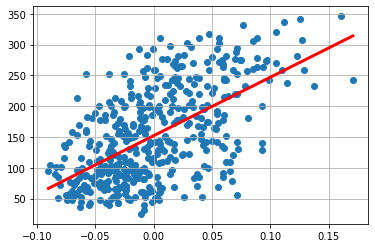

In [ ]:
# Find the index of the single variable with the best squared loss
imax = np.argmin(losses)

# Regression line over the range of x values
xmin = np.min(X[:,imax])
xmax = np.max(X[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
# this is a different approach to plotting a regression line then we used in the last demo
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(X[:,imax],y)
plt.grid()

In [ ]:
np.sum(X[:,1] <0)

235

Note that the calculations above to find the simple linear regression parameters could have been done without a for-loop as follows:

In [ ]:
# Remove the means
ym = np.mean(y)
y1 = y-ym  # a column vecotor each minus mean
Xm = np.mean(X,axis=0) # averaging over column, resulting a row vector of dimension natt
X1 = X - Xm[None,:] # minus the same mean in each column

# Compute the correlations per features
Sxx = np.mean(X1**2,axis=0) #a row vector with each element indicating the variance of one attribute
Sxy = np.mean(X1*y1[:,None],axis=0) #a row vector with each element indicating the covarance on one attribute to the targer

# Compute the coefficients and losses per feature
beta1 = Sxy/Sxx # element wise division, resulting a row vector containing  beta1 for each attribute
beta0 = ym - beta1*Xm # element wise multiplication, resulting a row vector containing beta0 for each attribute
errs = ((X*beta1) + beta0) - y[:,None] # results in a matrix where every column contains the residuals for predictor k
losses = np.sum(errs**2,axis=0) # sums up the squared size of the residuals across each column

Now let us see whether we get the same result:

In [ ]:
for k in range(natt):
    print(str(k)+" loss="+"{:.2e}".format(losses[k])+" beta0="+str(beta0[k])+" beta1="+str(beta1[k]))

0 loss=2.53e+06 beta0=152.13348416289605 beta1=304.1830745282949
1 loss=2.62e+06 beta0=152.13348416289594 beta1=69.71535567841437
2 loss=1.72e+06 beta0=152.1334841628967 beta1=949.4352603839499
3 loss=2.11e+06 beta0=152.13348416289585 beta1=714.7416437042887
4 loss=2.50e+06 beta0=152.13348416289597 beta1=343.2544518889645
5 loss=2.54e+06 beta0=152.1334841628959 beta1=281.7845933524593
6 loss=2.21e+06 beta0=152.13348416289566 beta1=-639.145279322514
7 loss=2.14e+06 beta0=152.13348416289568 beta1=696.8830300922432
8 loss=1.78e+06 beta0=152.13348416289628 beta1=916.1387228150995
9 loss=2.24e+06 beta0=152.13348416289614 beta1=619.2228206843332


## Improvements with a Multiple Variable Linear Model

One possible way to try to improve the fit is to use multiple variables at the same time.

We can manually compute the regression coefficients using the least-squares matrix formula given in class.

To compute the coefficients manually, we first append an all ones columns onto `X` using the `ones` command and `hstack`.  Note that after we do this, `X` will have 11 columns -- one more column that original data matrix.

In [ ]:
ones = np.ones((nsamp,1))
X_orig = X
X = np.hstack((ones,X_orig))
X.shape

(442, 11)

Next we need to solve $\min_{\mathbf{\beta}}\|\mathbf{y} - \mathbf{X\beta}\|_2^2$. The most obvious way to do so is via the direct matrix equation derived in class: $\mathbf{\beta}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.

In [ ]:
Xt = np.transpose(X)
beta= np.linalg.inv(Xt@X)@Xt@y
print(beta)

[ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]


Note that `beta[0]` is the value of the intercept from the regression fit.

An often slightly faster alternative is to use the `lstsq` method, which solves $\min_{\mathbf{\beta}}\|\mathbf{y} - \mathbf{X\beta}\|_2^2$ using a QR decomposition. This should find the exact same least-squares fit. You might get a warning when you run `lstqr` about some defaults changing in the future. You can safetly ignore.

In [ ]:
out = np.linalg.lstsq(X,y)
beta = out[0]
print(beta)

[ 152.13348416  -10.01219782 -239.81908937  519.83978679  324.39042769
 -792.18416163  476.74583782  101.04457032  177.06417623  751.27932109
   67.62538639]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Finally, for very large problems (many examples and/or features), *iterative* methods can offer a much faster approach to solving $\min_{\mathbf{\beta}}\|\mathbf{y} - \mathbf{X\beta}\|_2^2$. There are several options avialable in the `scipy` library, including the popular LSQR method.

In [ ]:
import scipy as sp

In [ ]:
out = sp.sparse.linalg.lsqr(X,y)
beta = out[0]
print(beta)

[ 152.13348416  -10.01219324 -239.81908542  519.8397932   324.39043343
 -792.18415438  476.74584526  101.04456435  177.06418529  751.27932909
   67.6253932 ]


Hopefully you got the same values of $\mathbf{\beta}$ no matter which algorithm you used. The differences are negligble because this demo problem is so small, but if you ever want to compare runtimes head-to-head, you can use the `time` library to time different operations. Here's an example that times the direct approach:

In [ ]:
import time
t = time.time()
beta= np.linalg.inv(Xt@X)@Xt@y
elapsed = time.time() - t
print("direct matrix computation time: " + str(elapsed) + " seconds")

direct matrix computation time: 0.00027251243591308594 seconds


Now let's compute the loss for our muliple variable model. Be careful with ndarrays dimensions! Always check what you're working with by running commands like `beta.shape`. Or multiplications may not behave as expected.

In [ ]:
print(X.shape)
print(beta.shape)

(442, 11)
(11,)


In [ ]:
yp = X@beta
errs = (y - yp)
print(errs.shape)
lossm = np.sum(errs**2)

print("multiple variable loss="+"{:.2e}".format(lossm))

(442,)
multiple variable loss=1.26e+06


Note that this loss is about $30\%$ lower than what we acheived with the best single variable linear regression, which is significant. Let's also normalize the loss to get an $R^2$ value, which we can compare to the value of $34\%$ we obtained earlier. Higher $R^2$ is better.

In [ ]:
rsqr = 1 - lossm/(nsamp*syy)
rsqr

0.5177494254132934

## Using built in sci-kit learn model

We can also fit the multiple variable linear regression model using Sci-kit Learn's built in functionality. As mentioned, this is a bit overkill at this point, but it's good to see because you might use other built in models from `sklearn` later in the course. The disadvantage is that this approach leaves everything inside a "black-box". For example, how do you think this method is solving the required least-squares optimization problem? Using an iterative method like `lsqr`? Or a direct method?

To fit the linear model, we first create a regression object and then fit the data with regression object.

In [ ]:
X = X[:,1:11]
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

You can see the intercept and other coefficients.

In [ ]:
regr.intercept_

152.1334841628965

In [ ]:
regr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

We next compute the squared loss by using the `predict` function and you can verify that it's the same as above.

In [ ]:
y_pred = regr.predict(X)
lossm = np.linalg.norm(y_pred - y)**2

print("multiple variable loss="+"{:.2e}".format(lossm))

multiple variable loss=1.26e+06
